In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tracks = pd.read_csv("fma-rock-vs-hiphop.csv")

In [5]:
tracks

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [7]:
echonest_metrics = pd.read_json("echonest-metrics.json", precise_float=True)

In [9]:
echonest_metrics

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [11]:
echo_tracks = pd.merge(echonest_metrics, tracks[["track_id", "genre_top"]], on="track_id")
echo_tracks

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [13]:
print(echo_tracks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB
None


In [15]:
corr_metrics = echo_tracks.drop(columns=['genre_top']).corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [45]:

features = echo_tracks.drop(["genre_top","track_id"], axis=1)

labels = echo_tracks["genre_top"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

In [19]:
scaled_train_features=pd.DataFrame(scaled_train_features,columns=features.columns)
scaled_train_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811
2,-1.204813,1.684139,0.312852,-1.602876,1.229828,0.135130,-0.777317,0.631077
3,-0.094655,0.417927,-0.265203,-1.553079,-0.607326,2.882707,-0.364657,1.652859
4,1.361706,-0.985896,1.453323,0.979975,-0.442757,-0.364157,-1.072003,-1.573102
...,...,...,...,...,...,...,...,...
4797,-0.203384,1.363997,0.918688,-1.604727,4.513867,1.798515,-0.899556,0.896463
4798,-1.173825,0.986358,0.423896,-1.604708,-0.375693,0.947464,-0.894909,-0.201397
4799,-1.294704,1.176828,0.132656,-1.604725,3.411080,0.851822,-0.935410,-0.079418
4800,-1.138691,-0.022534,0.571179,-1.604722,-0.555215,1.409515,1.313013,0.475138


In [21]:
features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661
1,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240
2,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661
3,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072
4,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018
...,...,...,...,...,...,...,...,...
4797,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4798,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4799,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4800,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


[0.24297674 0.18044316 0.13650309 0.12994089 0.11056248 0.08302245
 0.06923783 0.04731336]
8


Text(0.5, 0, 'Principal Component #')

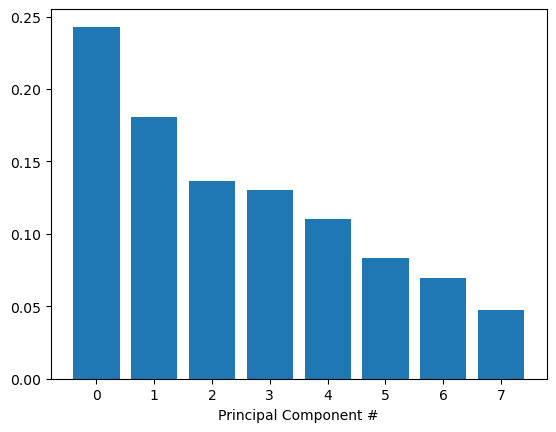

In [47]:

%matplotlib inline


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

print(pca.explained_variance_ratio_)
print(pca.n_components_)

fig, ax = plt.subplots()
ax.bar(range(8), exp_variance)
ax.set_xlabel('Principal Component #')

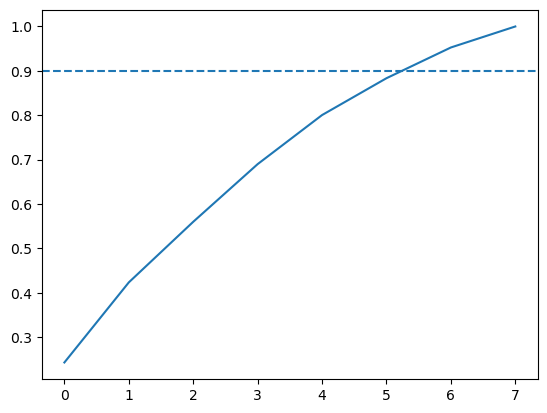

In [25]:

cum_exp_variance = np.cumsum(exp_variance)
fig, ax = plt.subplots()
ax.plot(range(8), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
n_components = 6

pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

pred_labels_tree = tree.predict(test_features)

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



In [31]:
hop_only = echo_tracks.loc[echo_tracks["genre_top"] == "Hip-Hop"]


rock_only = echo_tracks.loc[echo_tracks["genre_top"] == "Rock"].sample(len(hop_only), random_state=10)


rock_hop_bal = pd.concat([rock_only, hop_only])

features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

In [33]:
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)


logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.74      0.73      0.74       230
        Rock       0.73      0.74      0.73       225

    accuracy                           0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



In [35]:
from sklearn.model_selection import KFold, cross_val_score


kf = KFold(n_splits=10)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)


tree_score = cross_val_score(tree, pca_projection, labels, cv=kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv=kf)

print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.7489010989010989 Logistic Regression: 0.782967032967033


In [37]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(scaler, "models/scaler.pkl")

joblib.dump(pca, "models/pca.pkl")

joblib.dump(tree, "models/decision_tree.pkl")

joblib.dump(logreg, "models/logistic_regression.pkl")

print("Models, scaler, and PCA object saved successfully to the 'models' directory!")

Models, scaler, and PCA object saved successfully to the 'models' directory!


In [39]:
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import os

model_dir = r"C:\Users\srisa\Desktop\ML\Deployment\models"
files = {
    "scaler": os.path.join(model_dir, "scaler.pkl"),
    "pca": os.path.join(model_dir, "pca.pkl"),
    "tree": os.path.join(model_dir, "decision_tree.pkl"),
    "logreg": os.path.join(model_dir, "logistic_regression.pkl")
}


for key, path in files.items():
    print(f"{key}: {'Exists' if os.path.exists(path) else 'Missing'}")

_
try:
    scaler = joblib.load(files["scaler"])
    pca = joblib.load(files["pca"])
    tree = joblib.load(files["tree"])
    logreg = joblib.load(files["logreg"])

    print("Scaler fitted:", hasattr(scaler, "mean_"))
    print("PCA fitted:", hasattr(pca, "components_"))
    print("Decision Tree fitted:", hasattr(tree, "tree_"))
    print("Logistic Regression fitted:", hasattr(logreg, "coef_"))
except Exception as e:
    print(f"Error loading models: {e}")

scaler: Exists
pca: Exists
tree: Exists
logreg: Exists
Scaler fitted: True
PCA fitted: True
Decision Tree fitted: True
Logistic Regression fitted: True
